In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
# from dash import Dash, dcc, html, Input, Output

In [ ]:
def load_dataset():
  data=pd.read_csv('googleplaystore.csv')
  return data
load_data = load_dataset()

In [ ]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())

print_summarize_dataset(load_data)

Dataset dimension:
(10841, 13)
First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0  

In [ ]:
def clean_dataset(data):
    data.dropna(axis=0, inplace=True)
    data["Reviews"] = data["Reviews"].astype(np.int)
    data["Category"] = data["Category"].astype("string")
    data["Installs"] = data["Installs"].str.replace("+", '').str.replace(",", '').astype(int)
    data["Price"] = data["Price"].str.replace("$", '').astype(np.float)
    data["Last Updated"] = pd.to_datetime(data['Last Updated'])
    data["Genres"] = data["Genres"].str.replace("&", "and").astype("string")
    data["Size"] = data["Size"].str.replace("Varies with device", "NaN")
    data_size = data[data["Size"].str.contains("k", regex=False)]
    data_size["Size"] = data_size["Size"].str.replace("k", '').astype(float)/1000
    data["Size"].update(data_size["Size"])
    data['Size'] = data["Size"].str.replace("M", '').astype(float)
    data["Size"] = data["Size"].fillna(np.mean(data["Size"]))
    data["Content Rating"] = data["Content Rating"].str.replace("+", "")
    return data
clean_dataset = clean_dataset(load_data)
clean_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art and Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art and Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art and Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art and Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art and Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,23.746317,1000,Free,0.0,Mature 17,Books and Reference,2015-01-19,Varies with device,Varies with device


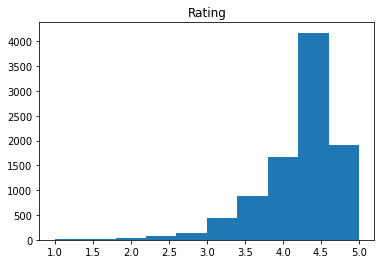

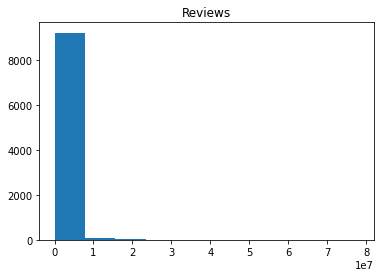

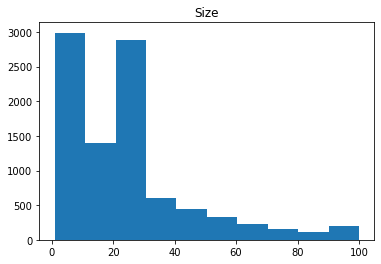

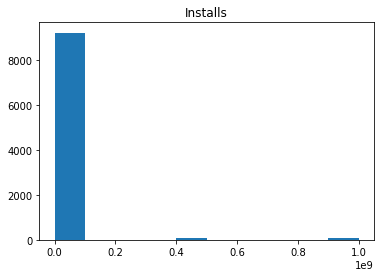

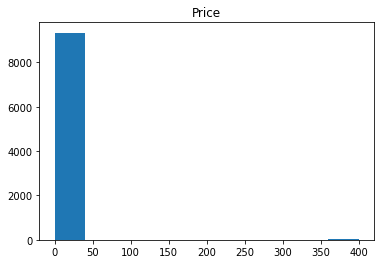

In [ ]:
def print_histogram(dataset):

  plt.title("Rating")
  plt.hist(dataset["Rating"])
  plt.show()
  plt.title("Reviews")
  plt.hist(dataset["Reviews"])
  plt.show()
  plt.title("Size")
  plt.hist(dataset["Size"])
  plt.show()
  plt.title("Installs")
  plt.hist(dataset["Installs"])
  plt.show()
  plt.title("Price")
  plt.hist(dataset["Price"])
  plt.show()

print_histogram(clean_dataset)

In [ ]:
my_list = []
def my_family_df(dataset):
    for i in dataset['Category']:
        if i == "FAMILY":
            fig = px.histogram(dataset['Type'])
            fig.show()
            break
my_family_df(clean_dataset)

In [ ]:
def my_area(clean_dataset):
  fig = px.area(clean_dataset["Category"], facet_col=clean_dataset["Rating"], facet_col_wrap=8, title="Category Rating")
  fig.show()
my_area(clean_dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4abc3971d0>,
      dtype=object)

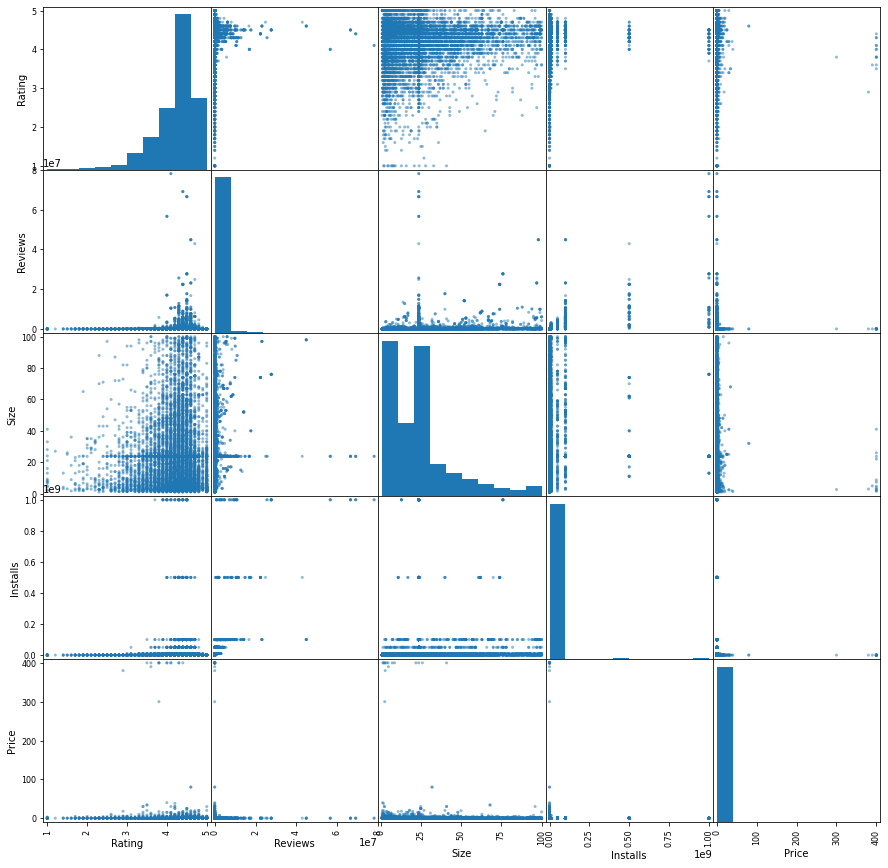

In [ ]:
# # import plotly.express as px

pd.plotting.scatter_matrix(clean_dataset,figsize=[15,15])

In [ ]:
def my_star_figure(clean_dataset):
  fig = go.Figure()
  fig.add_trace(go.Scatter(
      name="Raw Data",
      mode="markers", x=clean_dataset["Price"], y=clean_dataset["Rating"],
      marker_symbol="star"
  ))
  fig.update_xaxes(showgrid=True, ticklabelmode="period")
  fig.show()
my_star_figure(clean_dataset)

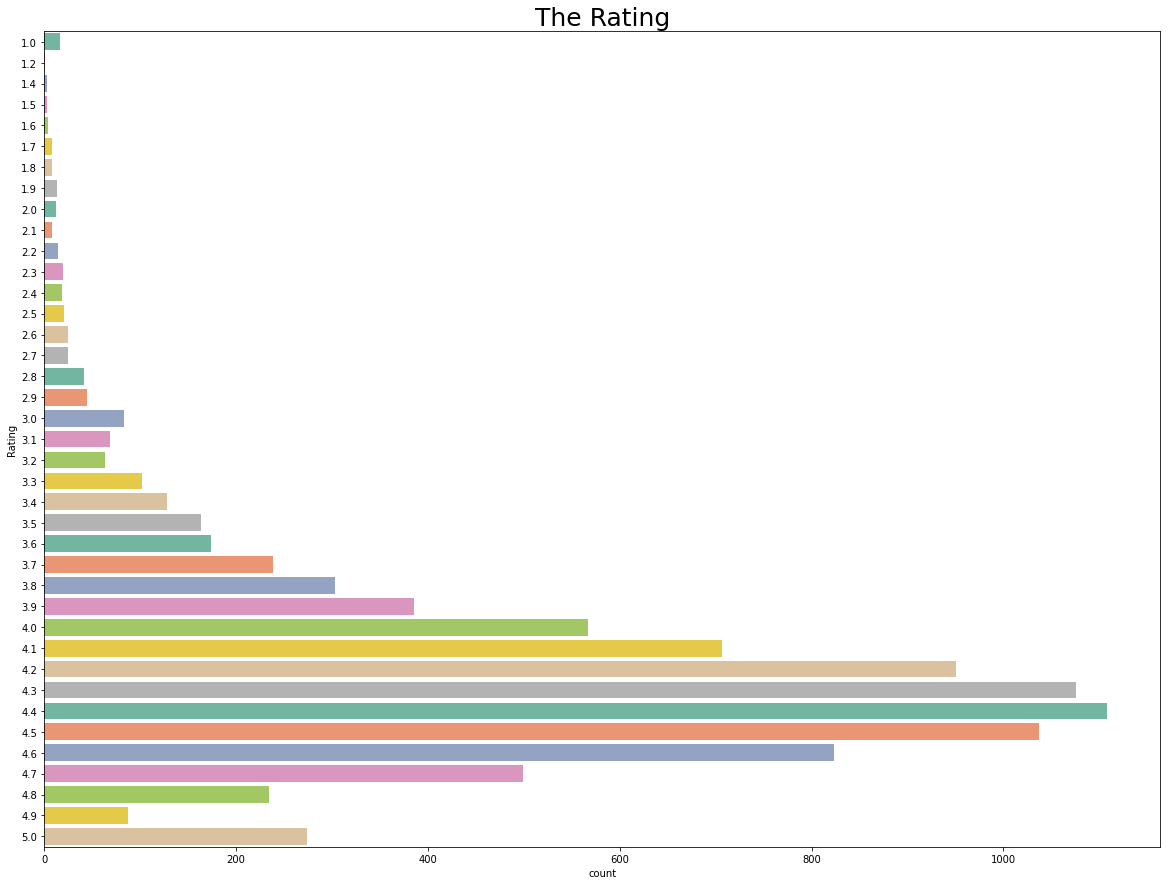

In [ ]:
def get_wino_style(dataframe):
    plt.figure(figsize=(20, 15))
    plt.title('The Rating', fontsize = 25)
    sns.countplot(y='Rating', data=dataframe, palette = "Set2")


get_wino_style(clean_dataset)

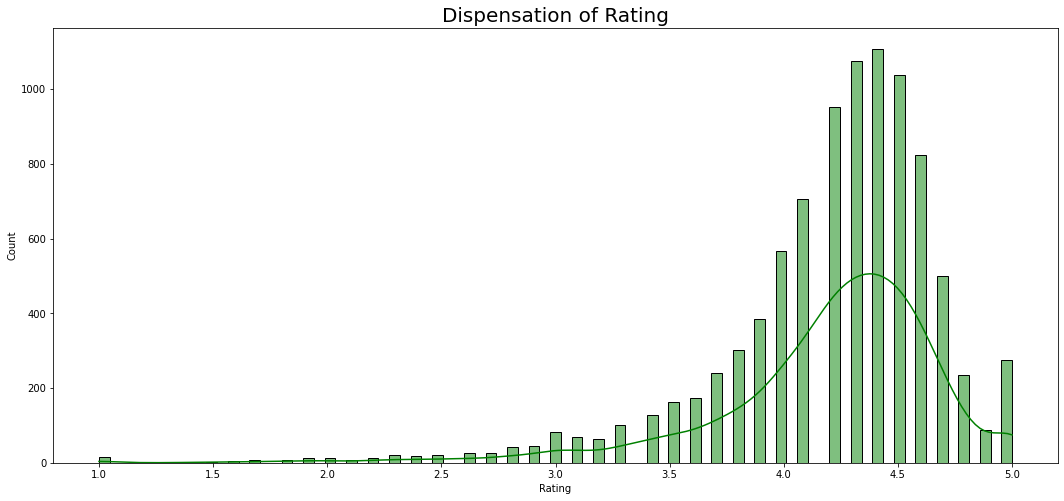

In [ ]:
def freq_of_ratings(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of Rating', fontsize=20)
    sns.histplot(data=dataset, x="Rating", kde=True, color= "green")
    plt.show()

freq_of_ratings(clean_dataset)

In [ ]:
def my_scttater_figure(clean_dataset):
  fig = go.Figure()
  fig.add_trace(go.Scatter(
      name="Raw Data",
      mode="markers", x=clean_dataset["Installs"], y=clean_dataset["Rating"],
      marker_symbol="circle-dot"
  ))
  fig.update_xaxes(showgrid=True, ticklabelmode="period")
  fig.show()
my_scttater_figure(clean_dataset)

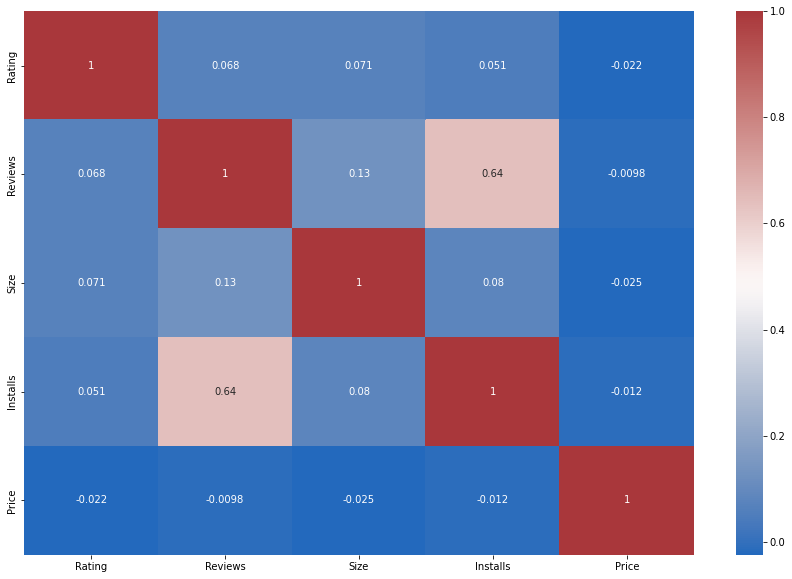

In [ ]:
def compute_correlations_matrix(dataset):
    corrMatrix = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()

compute_correlations_matrix(clean_dataset)